In [5]:
from calendar import c
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bayesianLearner import BayesianLearner

In [6]:
dataset = pd.read_csv("data/Data_for_UCI_named.csv")
# The p1 attribute is a non predictive one (calculated based on the other p attributes)
dataset = dataset.drop('p1', axis=1)
# Drop the other target column
dataset = dataset.drop('stab', axis=1)

learner = BayesianLearner(dataset)
learner.learn()

In [7]:
dataset = dataset.drop('stabf', axis=1)
for i in range(dataset.shape[0]):     
    prob = learner.predict(dataset.iloc[i], "stable")
    print("Probability of stable|x:", prob)
    prob = learner.predict(dataset.iloc[i], "unstable")
    print("Probability of unstable|x:", prob)

Probability of x|stable: 7.961910847351062e-07
Probability of x|unstable: 1.4032318012734746e-06


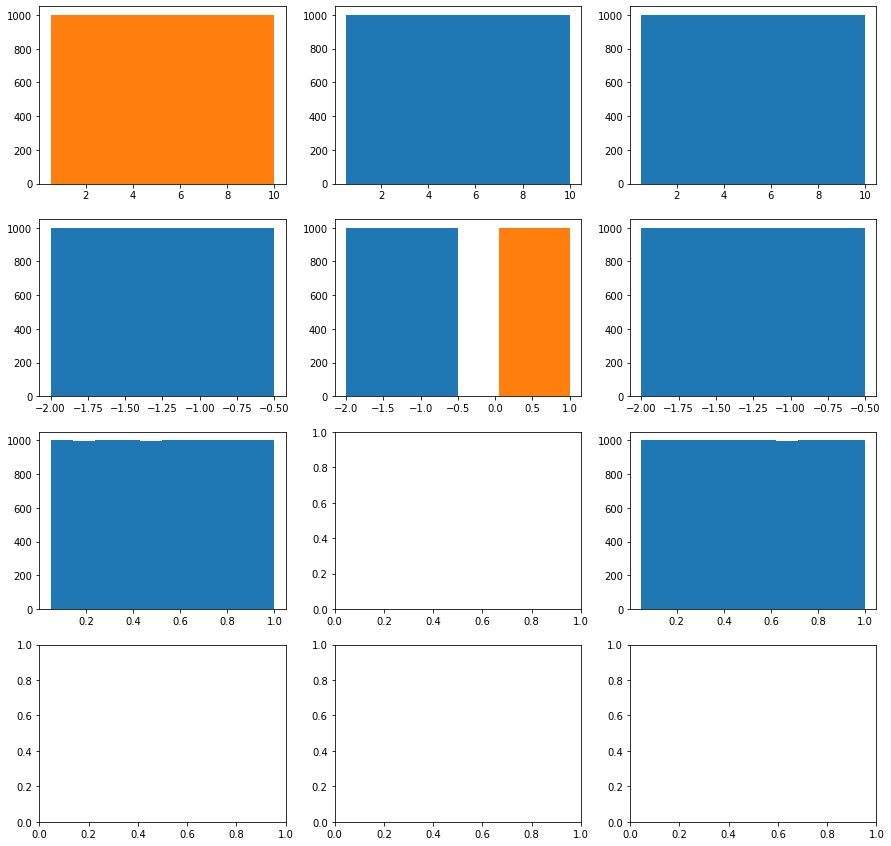

In [8]:
datasetNumerical = dataset.iloc[: , :-1]
fig, ax = plt.subplots(4,3, figsize=(15,15))

for i in range(datasetNumerical.shape[1]):
    if(i == 12):
        ax[3,2].hist(datasetNumerical.iloc[:,i])
    else:
        ax[int(i/4),i%3].hist(datasetNumerical.iloc[:,i])